In [233]:
%matplotlib inline

In [234]:
from pandas_datareader.data import get_data_yahoo
import pandas as pd
import matplotlib.pyplot as plt

In [304]:
#日経平均のヒストリカルデータをYahooからダウンロード
MUFG = get_data_yahoo(symbols='8306', start='4/1/2014')
FUKUI = get_data_yahoo(symbols='8362', start='4/1/2014')
NIKKEI = get_data_yahoo(symbols='^N225', start='4/1/2014')
#web.DataReader('***', 'yahoo', start='5/1/2016')と同じ

In [307]:
FUKUI.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-04-01,257.0,261.0,257.0,260.0,399000,245.595
2014-04-02,267.0,271.0,265.0,265.0,579000,250.318
2014-04-03,264.0,268.0,263.0,267.0,338000,252.207
2014-04-04,266.0,268.0,264.0,266.0,230000,251.263
2014-04-07,260.0,263.0,257.0,258.0,170000,243.706


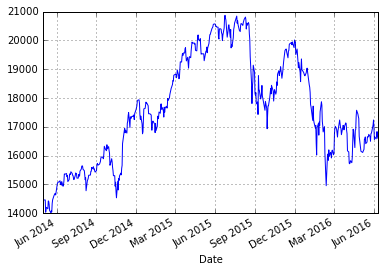

In [283]:
NIKKEI['Adj Close'].plot(grid=True)
plt.show()

C:\Users\聡\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,span=91,min_periods=0).mean()

C:\Users\聡\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,span=182,min_periods=0).mean()



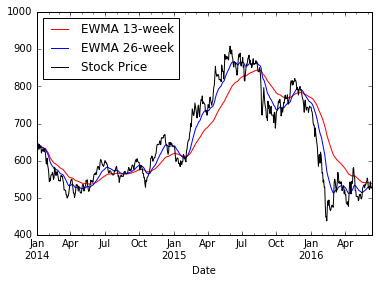

In [289]:
ewma91 = pd.stats.moments.ewma(MUFG['Adj Close'], span=91)
ewma182 = pd.stats.moments.ewma(MUFG['Adj Close'], span=182)
ewma75.plot(label="EWMA 13-week", color="red") # プロットする
ewma25.plot(label="EWMA 26-week", color="blue")
MUFG['Adj Close'].plot(label="Stock Price", color="black")

plt.legend(loc="best") # 各線のラベルを表示

日経平均とメガバンク

In [357]:
f = get_data_yahoo(symbols=['8306','^N225'], start='1/2/2016')

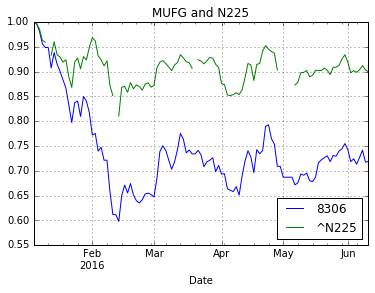

In [358]:
f['Adj Close']['8306'] /= f['Adj Close']['8306'][0]
f['Adj Close']['^N225'] /= f['Adj Close']['^N225'][0]
f['Adj Close'].plot(title='MUFG and N225', grid=True)
plt.show()

C:\Users\聡\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning:

pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5).corr(other=<Series>)



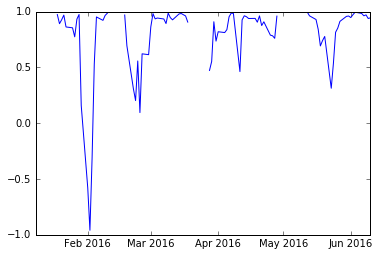

In [359]:
x = f['Adj Close']['8306']
y = f['Adj Close']['^N225']
roll_cor=pd.rolling_corr(x, y, window=5)

plt.plot(roll_cor)
plt.show()

日経平均と地方銀行

In [354]:
g = get_data_yahoo(symbols=['8362','^N225'], start='1/2/2016')

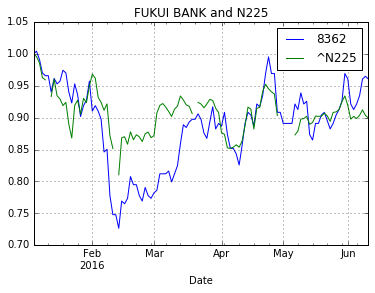

In [355]:
g['Adj Close']['8362'] /= g['Adj Close']['8362'][0]
g['Adj Close']['^N225'] /= g['Adj Close']['^N225'][0]
g['Adj Close'].plot(title='FUKUI BANK and N225', grid=True)
plt.show()

C:\Users\聡\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5).corr(other=<Series>)



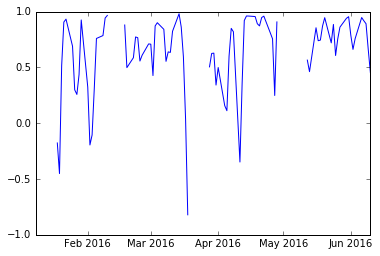

In [391]:
z = g['Adj Close']['8362']
roll_cor=pd.rolling_corr(z, y, window=5)

plt.plot(roll_cor)
plt.show()

日経平均と輸出産業

In [392]:
h = get_data_yahoo(symbols=['6981','^N225'], start='1/2/2016')

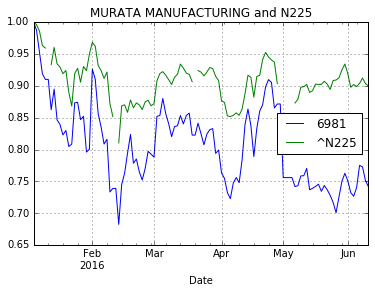

In [394]:
h['Adj Close']['6981'] /= h['Adj Close']['6981'][0]
h['Adj Close']['^N225'] /= h['Adj Close']['^N225'][0]
h['Adj Close'].plot(title='MURATA MANUFACTURING and N225', grid=True)
plt.show()

C:\Users\聡\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5).corr(other=<Series>)



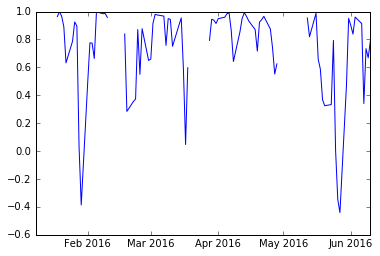

In [395]:
m = h['Adj Close']['6981']
roll_cor=pd.rolling_corr(m, y, window=5)

plt.plot(roll_cor)
plt.show()

In [399]:
n = web.DataReader('320', 'google', start='1/2/2016')

OSError: after 3 tries, Google did not return a 200 for url 'http://www.google.com/finance/historical?enddate=Jun+13%2C+2016&q=320&startdate=Jan+02%2C+2016&output=csv'